In [32]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

In [43]:
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 11)                22        
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 206 (824.00 Byte)
Trainable params: 206 (824.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
history=model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.7972
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.8120
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8379
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8367
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8390
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 0.8361
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8370
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8382
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4003 - accuracy: 0.8380
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4002 - accuracy: 0.8380

In [29]:
model.layers[1].get_weights()

[array([[ 1.6110902],
        [-1.8298137],
        [-2.7698839]], dtype=float32),
 array([-0.03417363], dtype=float32)]

In [34]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [35]:
y_pred = np.where(y_log>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8335

In [39]:
import matplotlib.pyplot as plt

KeyError: 'val_accuracy'

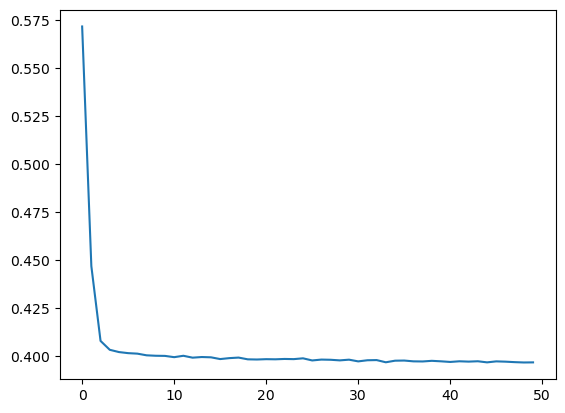

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])